<a href="https://colab.research.google.com/github/shuwang127/Python-Logistic/blob/master/Python_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read data from .txt file.

In [24]:
import numpy as np
f = open('./drive/My Drive/Colab Notebooks/Student-Pass-Fail-Data.txt', 'r')
next(f) # skip the first row.
data = np.array([[int(num) for num in line.split(',')] for line in f])
print('data:\n', data)

data:
 [[ 7 27  1]
 [ 2 43  0]
 [ 7 26  1]
 ...
 [ 3 39  0]
 [ 7 25  1]
 [ 5 37  0]]


Divide data into features (Self_Study_Daily, Tuition_Monthly) and labels (Pass_Or_Fail).

In [25]:
x = data[:,:-1]
y = data[:,-1]
print('x:\n', x, '\ny:\n', y)

x:
 [[ 7 27]
 [ 2 43]
 [ 7 26]
 ...
 [ 3 39]
 [ 7 25]
 [ 5 37]] 
y:
 [1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 

Split the data into train and test sets.

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Define the LR model.

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

Fit the training data with LR model. (take two parameters: x_train and y_train)

In [28]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Get predictions for testing data.

In [29]:
y_pred = logistic_regression.predict(x_test)
print(y_pred)

[0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1]


Calculate the testing accuracy with actual labels and predicted labels.

In [30]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy = %.2f%%.' % (accuracy * 100))

Testing accuracy = 97.50%.


Plot the decision boundary visually.

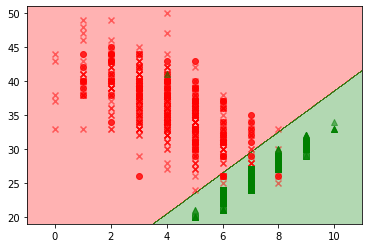

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x1, x2 = np.meshgrid(np.arange(min(x[:,0])-1, max(x[:,0])+1, 0.02), np.arange(min(x[:,1])-1, max(x[:,1])+1, 0.02)) # mesh.
Z = logistic_regression.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) # get predictions for mesh.
plt.contourf(x1, x2, Z, alpha=0.3, cmap=ListedColormap(('red', 'green'))) # plot decision boundary.
for cls in range(2):
    plt.scatter(x=x_train[y_train==cls, 0], y=x_train[y_train==cls, 1], alpha=0.5, c=('red', 'green')[cls], marker=('x', '^')[cls], label=cls) # plot training set.
    plt.scatter(x=x_test[y_test == cls, 0], y=x_test[y_test == cls, 1], alpha=0.8, c=('red', 'green')[cls], marker=('o', 's')[cls], label=cls) # plot testing set.
plt.show()